<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Santiago Romero Riggen, Juan Pablo Rodríguez Alonso y Andrés Ramírez Villanueva.

**Fecha:** 25 de Junio del 2021.

**Expediente** : if715099, if715180 y if726061.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/andres1999iteso/Proyecto1-RAMIREZ_JP_RODRIGUEZ_ROMERO
# Proyecto simulación Pokémon 

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Proyecto_en_construccion.jpg" width="300px" height="100px" />


# Proyecto Módulo 2- Guía.
> Se especifican los componentes básicos que deberá tener cada proyecto. El proyecto debe ser un problema que utilice datos reales, ya sea de una empresa física real o de alguna página de internet que proporcione bases de datos confiables. Con la información obtenida, se pretende utilizar todas las herramientas vistas durante el curso para la correcta modelación y simulación del cierto problema con ciertas variables de interés.

___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Predicción victoria Pikachu.

> Utilizaremos los datos reales de las características de combate ⚔ de los Pokémon para poder sacar las probabilidades de una posible victoria de Pikachu al encontrarse un Pokémon en el mapa de forma aleatoria 🔀. Son más de 700s Pokémon a los que Pikachu se podría enfrentar en el pueblo Paleta por lo que un estudio estadístico es de gran utilidad para saber nuestras probabilidades, incluso se puede tomar en cuenta este análisis en un escenario donde el usuario asiste a un torneo y desea saber si puede o no ganar.

### 1.2 Objetivos.

> #### 1.1 Objetivo general.
> - Obtener las probabilidades de éxito de Pikachu en un combate cara a cara con cualquier Pokémon aleatorio que se le pueda poner en frente durante el juego.

> #### 1.2 Objetivos específicos
   > - 
   > -      
   > - Estimar y proyectar la probabilidad de que Pikachu resulte victorioso al enfretarse a un rival de manera aleatoria.
   > - Encontrar en que sería mejor entrenar a Pikachu.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos

### 1.3 Definición del problema.
> Cuando estás jugando Pokémon y seleccionas a tu personaje favorito, en este caso Pikachu, queremos saber que tan difícil sería ganar en caso de enfrentarnos a cualquier Pokémon de manera aleatoria conociendo los más de 700s Pokémon y sus atributos. 


### 1.4 Nodos y variables que se decidieron simular y porqué
Tomaremos cuatro variables que nos parece son importantes a simular pues nos pueden dar una buena idea de lo que deberíamos cambiar en el entrenemiento o en su defecto en una apuesta, estas variables o "nodos" son:

- **Fuerza de ataque**: El ataque, en las estadísticas de un Pokémon, representa la fuerza natural del Pokémon al realizar un movimiento físico, se consideran físicos donde el Pokémon cause un daño al hacer contacto con otro Pokémon o en el que requiera usar fuerza física.

- **Fuerza de defensa**: La defensa, representa la resistencia natural de un Pokémon ante los movimientos físicos. Al igual que el ataque, puede ser incrementada o disminuida en combate por el uso de ciertos movimientos, habilidades y objetos.

- **Ataque especial**: El ataque especial, representa la fuerza con la que un Pokémon realiza un movimiento especial, éstos son movimientos en los que se realiza un ataque a distancia, o uno en el que se libera energía del Pokémon. Los ataques especiales se miden con el ataque especial de nuestro Pokémon y la defensa especial de nuestro rival.

- **Velocidad**: Velocidad es la propiedad del Pokémon de atacar, antes o después, que el oponente. A la hora de atacar el Pokémon con un mayor valor de velocidad, por lo general, siempre atacará primero. 

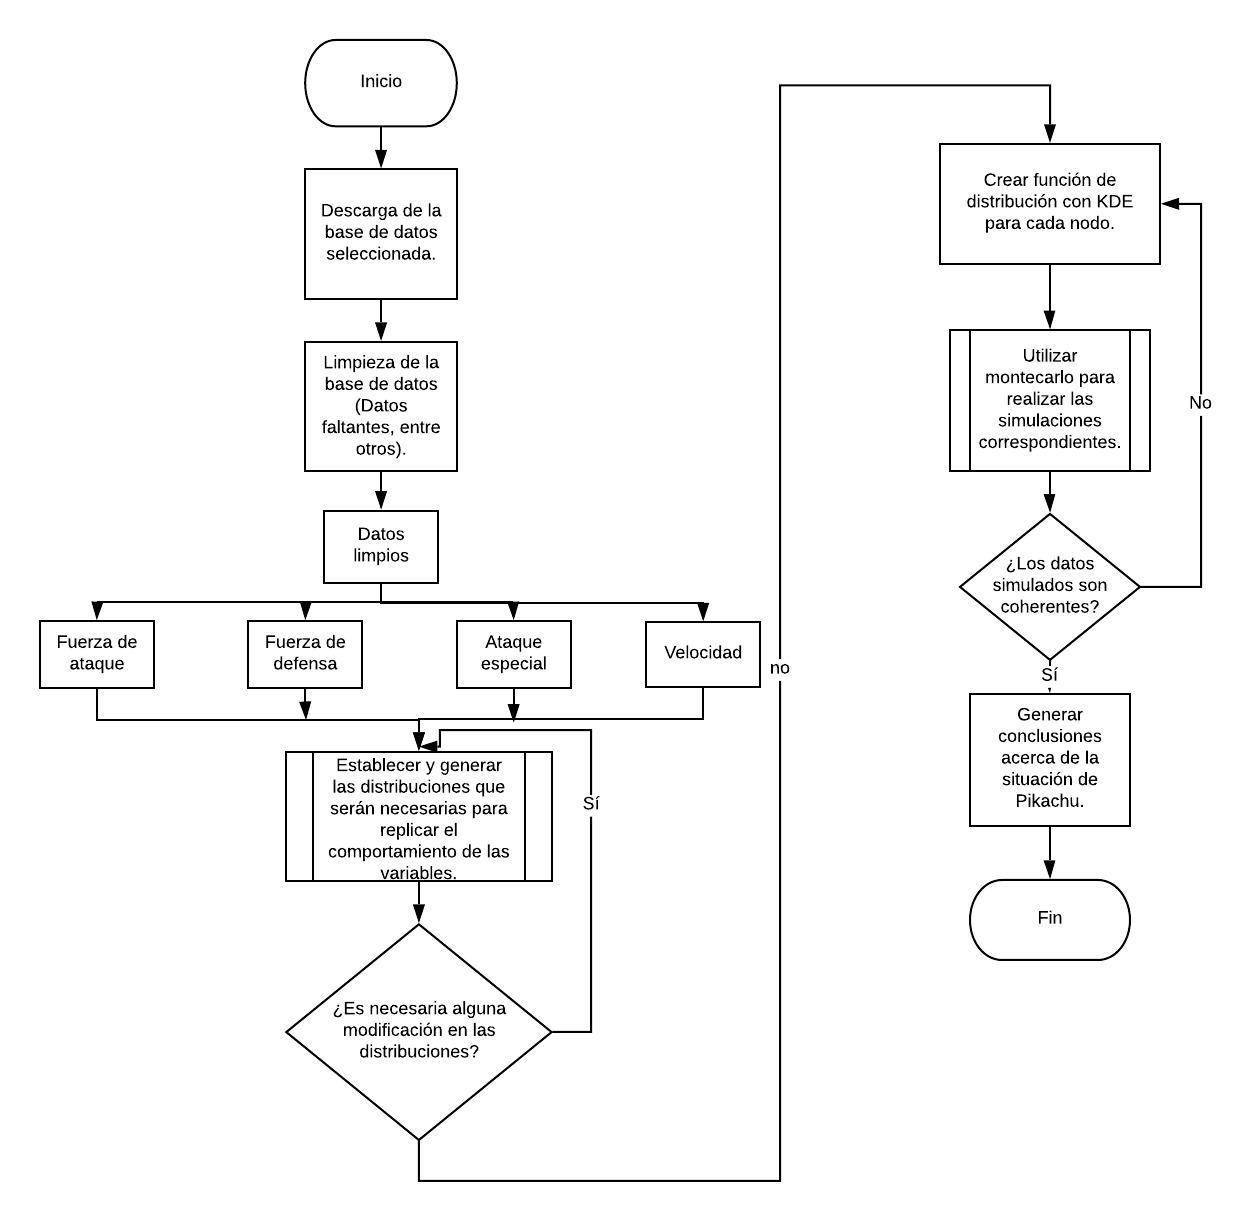


### 1.5 Definición de hipótesis y supuestos.

**Supuestos**

- Los Pokémon pueden aparecer de manera aleatoria independientemente al rival que se enfrenten.
- También se considera que no han evolucionado y que todos están en su estado inicial.

**Hipótesis**

- Pikachu tendrá una velocidad mayor a la media de los Pokémon.
- Nuestro Pokémon tendrá una defensa myor a la media de los demás.
- También tendrá un ataque especial mayor a la media de los demás.
- Tendrá una fuerza de ataque mayor a la media de los demás.


### 1.6 Obtención de bases de datos
> Se obtuvo la base de datos de la plataforma kaggle que ofrece una alta gama de datasets. Este dataset de Pokémon incluye variables como el ataque, defensa, velocidad, tipo, etc, y nosostros optamos por escoger las más significativas según jugadores de Pokémon, a continuación el enlace a la página [Kaggle](https://www.kaggle.com/abcsds/pokemon).


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import scipy.stats as st

data = pd.read_csv('Pokemon.csv').dropna()

x=['Attack','Defense','Sp. Atk','Speed']


for i in range(4):
    plt.hist(data[x[i]],bins=20,label=x[i])
    plt.legend()
    plt.show()
data

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [2]:
data1 = data["Name"] == "Pikachu"
Pikachu = data[data1]

In [3]:
Pikachu

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.8 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.9 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

In [4]:
# Funciones a utilizar en el proyecto

def kde_sklearn(x, x_grid, bandwidth=5, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

def generador_vad(proba_acum: 'Probabilidad acumulada', indices: 'Valores por generar', N: 'Aleatorios por generar'):
    diccionario = {i: idx for i, idx in enumerate(indices)}
    U = np.random.rand(N)
    y = pd.Series([sum([1 for p in proba_acum if p < ui]) for ui in U]).map(diccionario)
    return y

def kde_sklearn_mod(x, bandwidth=5, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x_grid: np.exp(kde_skl.score_samples(x_grid[:, np.newaxis])) if isinstance(x_grid, np.ndarray) else \
        np.exp(kde_skl.score_samples(np.array[x_grid])[:, np.newaxis])
    return pdf

def muestreo_est(B: 'Número de estratos'):
    u= np.random.uniform(B) 
    i=np.arange(0,B) 
    v = (u+i)/B 
    return v 

# Nodo 1: Fuerza de ataque

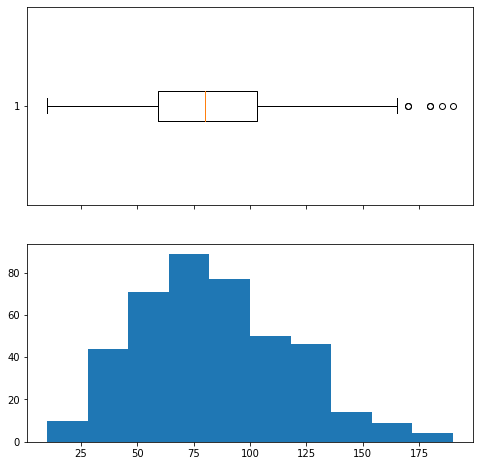

In [5]:
ataque=np.array(data['Attack'])
fig,(ax1,ax2) = plt.subplots(2,1,sharex= True,figsize=(8,8))
ax1.boxplot(ataque,vert=False)
ax2.hist(ataque,bins = 10) 
plt.show()

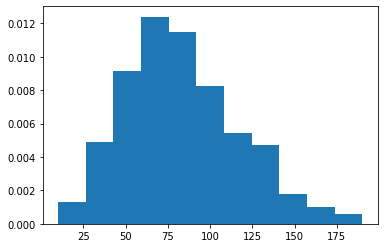

In [6]:
y, x ,b = plt.hist(ataque, bins=11, density=True)
x = x[1:]

# ------------------------------------------------------------------------------------------------------------

In [7]:
# Pruebas de hipóstesis

params = st.betaprime.fit(x)

pi = st.beta.pdf(x,*params)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei,ddof=0)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = 20-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  5.759232505248425
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=5.759232505248425, pvalue=0.8350695218886623)
Estadístico de chi_cuadrado =  27.58711163827534


C:\Users\jonha\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:667: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\jonha\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:671: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
C:\Users\jonha\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1059: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\Users\jonha\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


La prueba de hipótesis arroja como resultado
 Ttest_1sampResult(statistic=0.1050079301223422, pvalue=0.9164204947327985)
Cálculo del estadístico de prueba teórico= 0.10513498150592315
Región de rechazo = (t<-0.8349345092404805) U (t>0.8349345092404805)


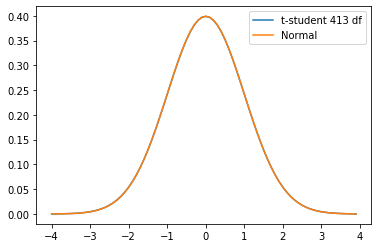

In [8]:
media = ataque.mean()
sd = ataque.std()
N = len(ataque)
# Nivel de confianza
confianza = 0.95
# Datos reales
X = ataque

# Hipótesis nula
media2 = 83
# Realizamos la prueba de hipotesis para H0= mu=media2
ho = st.ttest_1samp(X, media2)
print('La prueba de hipótesis arroja como resultado\n',ho)
# Calculamos el estadístico normalizado
t = (np.mean(X) - media2)/(np.std(X) / np.sqrt(N))
print('Cálculo del estadístico de prueba teórico=', t)

# Cálculo de la región de rechazo
confianza_ph = 0.05
cuantil = st.t(N-1).cdf(1-confianza_ph/2)
print(f'Región de rechazo = (t<{-cuantil}) U (t>{cuantil})')

# Gráfica t-student
# %matplotlib inline
dat = np.arange(-4,4,.1)
# for i in range(1):
y = st.t.pdf(dat,df=N-1)
y1=st.norm.pdf(dat)
plt.plot(dat,y,label='t-student %d df' %(N-1))
plt.plot(dat,y1,label='Normal')
plt.legend()
plt.show()

Se acepta

# ------------------------------------------------------------------------------------------------------------

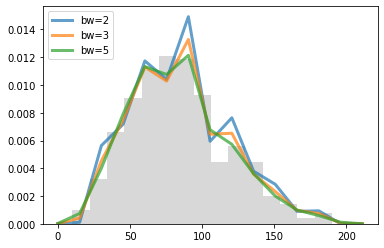

In [9]:
# KDE
fig, ax = plt.subplots()
for bandwidth in [2,3,5]:
    ax.plot(np.linspace(0,211,15), kde_sklearn(ataque, np.linspace(0,211,15), bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(ataque, 15, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')

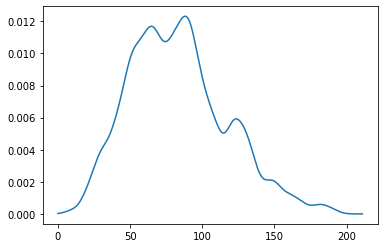

In [14]:
# Reducción de varianza y Montecarlo

N=10000

f_1=kde_sklearn_mod(ataque)
proba = f_1(np.arange(0,211,.1))
f_acum = proba.cumsum()
u = muestreo_est(N)
funcion2 = lambda u: (generador_vad(f_acum, ataque, N))
o=np.array(funcion2(u))

plt.plot(np.arange(0,211,.1),f_1(np.arange(0,211,.1)))

C:\Users\jonha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jonha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


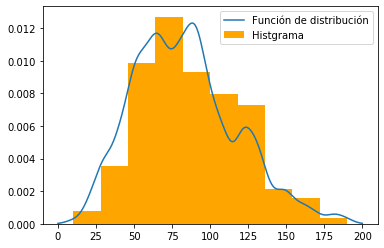

In [11]:
plt.hist(o, bins=10, density = True, color = 'orange',label='Histgrama')
plt.plot(np.arange(0,200,.1),f_1(np.arange(0,200,.1)),label='Función de distribución')
plt.legend()
plt.show()

In [12]:
# Nivel de confianza
confianza = .95
media = ataque.mean()
sd = ataque.std()

# Intervalo de confianza usando t-student
i1 = st.t.interval(confianza, len(ataque)-1, loc=np.mean(ataque), scale=st.sem(ataque))

print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(confianza,i1))
print('Media calculada' ,np.mean(o))

Con una confianza de 0.95 la media estará en el intervalo t,
 (79.9183004282012, 86.42952565875532)     
Media calculada nan


# Q-Q 

In [13]:
np.mean(o)

nan

**Conclusión nodo 1:** Por medio de la distribución que hemos sacado por medio de las herramientas que nos parecieron útiles observamos que la media calculada está por encima de los 76 puntos de ataque

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>